In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimization
from scipy.optimize import least_squares
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [7]:
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant1/zero_csvdf_ant1_zero_7.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant2/zero_csvdf_ant2_zero_7.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/ant3/zero_csvdf_ant3_zero_7.csv'
path = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero/zero_csv/no_sep_IQ_info_zero_1.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant1_45_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant2_45_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/45degrees/df_ant3_45_2.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant1_30_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant2_30_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/30degrees/df_ant3_30_2.csv'
# path1 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant1_0_posi0_2.csv'
# path2 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant2_0_posi0_2.csv'
# path3 = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zero_degree_zero_posi/df_ant3_0_posi0_2.csv'

# df1 = pd.read_csv(path1) # in each channel we have 96 data points per antenna
# df2 = pd.read_csv(path2)
# df3 = pd.read_csv(path3)
df1 = pd.read_csv(path)
len(df1)

19536

In [10]:
t = df1[df1.Channel >= 11]
t['omega'] = (t['Channel']-11)*2+ 2428.25
tless = df1[df1.Channel < 11]
tless['omega'] = (tless['Channel'])*2 + 2404.25
df1 = t.append(tless)

<ipython-input-10-3d26178556e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['omega'] = (t['Channel']-11)*2+ 2428.25
<ipython-input-10-3d26178556e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tless['omega'] = (tless['Channel'])*2 + 2404.25


# Optimize the points
Using non-linear least squre fitting. to fit the pounts to the expected curve. 

In [11]:
df1['ts'] = df1['time_stamp']
# df = df1.drop(df1[df1.time_per_channel > 151.75].index)

In [6]:
ts = np.arange(0.25,74.25, 0.25)
N = int(len(df1)/296)
for n in range(N):
    for i in range(len(ts)):
        df1['ts'][i+n*296] = ts[i]
# df1[(N-1)*296:296*(N)] 

<ipython-input-6-3383be4a4c02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ts'][i+n*296] = ts[i]


In [183]:
# df1.unstack(level=0)[['ts']].plot(subplots=True, title="ts", color= '#28156c', label='ts', legend=True)

In [119]:
# optomize the data from ANT1
def s(theta, t ):
    x = theta[0] * np.cos(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

# ts = df1.ts
ts = df1.time_stamp

phi = 0;
Ai = df1.Magnitude.mean()
Aq = df1.Magnitude.mean()
fc = df1.omega.mean(); 
ss = s([Ai, Aq, fc, phi], ts)
ss[0] += df1['I']
ss[1] += df1['Q']

def fun(theta):
    return (ss- s(theta, ts)).flatten()

theta0 = [0,0,0,0]
res1 = least_squares(fun, theta0)
N = int(len(res1.fun)/2)
new_i1 = res1.fun[0:N]
new_q1 = res1.fun[N:len(res1.fun)]

In [7]:
# optomize the data from ANT1
def s(theta, t ):
    x = theta[0] * np.cos(2*np.pi*t*fc + phi)
    y = theta[1] * np.sin(2*np.pi*t*fc + phi)
    return np.array([x, y])

# ts = df1.ts
new_i_lst = []
new_q_lst = []

phi = 0;
for i in range(0, len(df1), 296):
    Ai = df1.Magnitude[i:i+296].mean()
    Aq = df1.Magnitude[i:i+296].mean()
    fc = df1.omega[i:i+296].mean(); 
    ts = df1.time_stamp[i:i+296]
    ss = s([Ai, Aq, fc, phi], ts)
    ss[0] += df1['I'][i:i+296]
    ss[1] += df1['Q'][i:i+296]
    

    def fun(theta):
        return (ss- s(theta, ts)).flatten()

    theta0 = [0,0,0,0]
    res1 = least_squares(fun, theta0)
    N = int(len(res1.fun)/2)
    new_i1 = res1.fun[0:N]
    new_i_lst.append(new_i1)
    new_q1 = res1.fun[N:len(res1.fun)]
    new_q_lst.append(new_q1)

In [8]:
len(new_q_lst[0])

296

In [239]:
len(res1.jac)/2, len(new_i1)/296, np.angle(res1.x[0]+ 1j*res1.x[1])*180/np.pi, len(df1),  df1.Magnitude[0:296].mean()

(240.0, 0.8108108108108109, 36.51862124794193, 19536, 50.57293187745213)

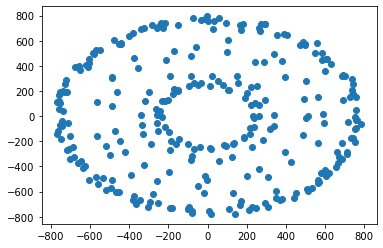

In [9]:
plt.scatter(new_i1[0:288], new_q1[0:288])

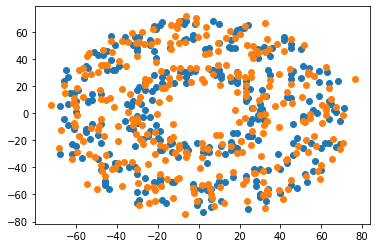

In [76]:
plt.scatter(df1['I'][0:296], df1['Q'][0:296])
plt.scatter(new_i_lst[0], new_q_lst[0])

In [35]:
df1['time_per_channel'] =  df1['time_stamp']
for i in range(0, len(df1)- 296, 296):
    df1['time_per_channel'][i+296:i+2*296] = df1['time_stamp'][0:296]

<ipython-input-35-f447405a5dd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time_per_channel'][i+296:i+2*296] = df1['time_stamp'][0:296]


In [100]:
from itertools import chain
flatten_i = list(chain.from_iterable(new_i_lst))
flatten_q = list(chain.from_iterable(new_q_lst))
df1['new_i'] = flatten_i
df1['new_q'] = flatten_q
df1[0:288]

,pkt,Channel,ant_info,I,Q,Magnitude,time_stamp,sample_idx,omega,ts,new_i,new_q,time_per_channel
0,0,35,(65+7j),65,7,65.375837,9.00,36,2476.25,0.25,65.000000,10.478436,9.00
1,0,35,(62-22j),62,-22,65.787537,9.25,37,2476.25,0.50,65.500971,-18.786344,9.25
2,0,35,(52-45j),52,-45,68.767725,9.50,38,2476.25,0.75,58.468952,-42.540374,9.50
3,0,35,(33-65j),33,-65,72.897188,9.75,39,2476.25,1.00,41.452093,-63.668860,9.75
4,0,35,(-30+46j),-30,46,54.918121,11.00,44,2476.25,1.25,-30.000000,42.521564,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0,35,(18+48j),18,48,51.264022,149.75,599,2476.25,71.00,26.452093,49.331140,149.75
284,0,35,(-6-25j),-6,-25,25.709920,151.00,604,2476.25,71.25,-6.000000,-28.478436,151.00
285,0,35,(-13-22j),-13,-22,25.553865,151.25,605,2476.25,71.50,-16.500971,-25.213656,151.25
286,0,35,(-19-13j),-19,-13,23.021729,151.50,606,2476.25,71.75,-25.468952,-15.459626,151.50


In [45]:
df = df1.drop(df1[df1.time_per_channel > 151.75].index)
N = int(len(df)/288)

In [46]:
lst_ant1 = []
lst_ant2 = []
lst_ant3 = []


for i in range(0, len(df), 12):    
    lst_ant2.append(df[i:i+4])
    lst_ant1.append(df[i+4:i+8])
    lst_ant3.append(df[i+8:i+12])

In [99]:
print(len(df_ant1), len(df_ant2),len(df_ant3))

6336 6336 6336


In [47]:
df_ant1 = pd.concat(lst_ant1,  ignore_index=True)
df_ant2 = pd.concat(lst_ant2, ignore_index=True)
df_ant3 = pd.concat(lst_ant3, ignore_index=True)

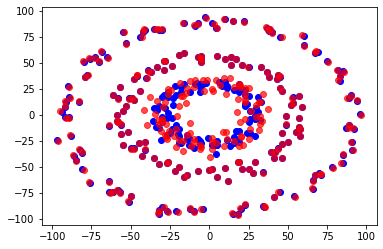

In [98]:
plt.scatter(df_ant3['I'][0:288], df_ant3['Q'][0:288], c = 'b')
plt.scatter(df_ant3['new_i'][0:288], df_ant3['new_q'][0:288], c = 'r', alpha = 0.7)

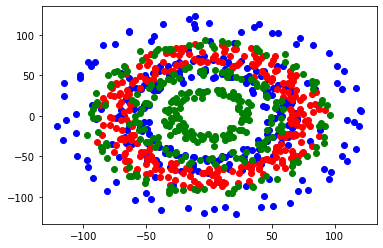

In [80]:
plt.scatter(df_ant1['I'][0:288], df_ant1['Q'][0:288], c = 'b')
plt.scatter(df_ant2['I'][0:288], df_ant2['Q'][0:288], c = 'r')
plt.scatter(df_ant3['I'][0:288], df_ant3['Q'][0:288], c = 'g')

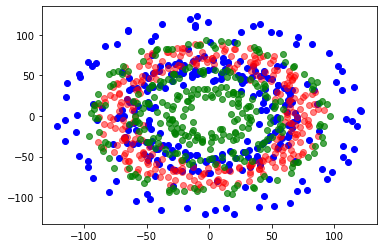

In [81]:
plt.scatter(df_ant1['new_i'][0:288], df_ant1['new_q'][0:288], c = 'b')
plt.scatter(df_ant2['new_i'][0:288], df_ant2['new_q'][0:288], c = 'r', alpha = 0.5)
plt.scatter(df_ant3['new_i'][0:288], df_ant3['new_q'][0:288], c = 'g', alpha = 0.7)

In [48]:
X12 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant2['I'] - 1j*df_ant2['Q'])
X23 = (df_ant2['I'] + 1j*df_ant2['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X13 = (df_ant1['I'] + 1j*df_ant1['Q']) * (df_ant3['I'] - 1j*df_ant3['Q'])
X12_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant2['new_i'] - 1j*df_ant2['new_q'])
X23_opt = (df_ant2['new_i'] + 1j*df_ant2['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])
X13_opt = (df_ant1['new_i'] + 1j*df_ant1['new_q']) * (df_ant3['new_i'] - 1j*df_ant3['new_q'])

In [49]:
d = {'channel': df_ant1['Channel'],'omega':df_ant1['omega']}
data = pd.DataFrame(data=d)
data['phi12'] = np.angle(X12)
data['phi23'] = np.angle(X23)
data['phi13'] = np.angle(X13)
data['mag12'] = np.abs(X12)
data['mag23'] = np.abs(X23)
data['mag13'] = np.abs(X13)

In [70]:
data['phi12_opt'] = np.angle(X12_opt)
data['phi23_opt'] = np.angle(X23_opt)
data['phi13_opt'] = np.angle(X13_opt)
data['mag12_opt'] = np.abs(X12_opt)
data['mag23_opt'] = np.abs(X23_opt)
data['mag13_opt'] = np.abs(X13_opt)

In [51]:
phi_channel = []
for i in range(0, len(data),96):
    phi_channel.append({"channel":data['channel'][i], "omega":data['omega'][i],
                       "ave_phi12": np.average(data['phi12'][i:i+96]),
                       "ave_phi23": np.average(data['phi23'][i:i+96]),
                        "ave_phi13": np.average(data['phi13'][i:i+96]),
                        "ave_phi12_opt": np.average(data['phi12_opt'][i:i+96]),
                       "ave_phi23_opt": np.average(data['phi23_opt'][i:i+96]),
                        "ave_phi13_opt": np.average(data['phi13_opt'][i:i+96]),
                       "ave_mag12": np.average(data['mag12'][i:i+96]),
                       "ave_mag23": np.average(data['mag23'][i:i+96]),
                       "ave_mag13": np.average(data['mag13'][i:i+96]),})
average_perchannel = pd.DataFrame(phi_channel)

In [52]:
print(' angle per paire', np.average(average_perchannel['ave_phi12'])*180/np.pi, np.average(average_perchannel['ave_phi23'])*180/np.pi, np.average(average_perchannel['ave_phi13'])*180/np.pi,
     '\n average mag per paire', np.average(average_perchannel['ave_mag12']), np.average(average_perchannel['ave_mag23']), np.average(average_perchannel['ave_mag13']),
     '\n total average of angle', (np.average(average_perchannel['ave_phi12'])/3+ np.average(average_perchannel['ave_phi23'])/3+ np.average(average_perchannel['ave_phi13'])/3)*180/np.pi,
     '\n STD per paire', average_perchannel['ave_phi12'].std(), average_perchannel['ave_phi23'].std(), average_perchannel['ave_phi13'].std())

 angle per paire 125.64881455335913 95.61672351335247 -138.05264375147027 
 average mag per paire 179108.11071228757 146438.80396972594 230263.96580234275 
 total average of angle 27.73763143841377 
 STD per paire 0.2829257040522641 0.4643836003041056 0.27966520503374975


In [53]:
print(' Angle_per paire', np.average(average_perchannel['ave_phi12_opt'])*180/np.pi, np.average(average_perchannel['ave_phi23_opt'])*180/np.pi, np.average(average_perchannel['ave_phi13_opt'])*180/np.pi,
     '\n Average', (np.average(average_perchannel['ave_phi12_opt'])/3+ np.average(average_perchannel['ave_phi23_opt'])/3+ np.average(average_perchannel['ave_phi13_opt'])/3)*180/np.pi,
     '\n STD', average_perchannel['ave_phi12_opt'].std(), average_perchannel['ave_phi23_opt'].std(), average_perchannel['ave_phi13_opt'].std())

 Angle_per paire 125.47978290757813 95.96942017242111 -137.86897873818262 
 Average 27.860074780605537 
 STD 0.2824485790044729 0.464626553743889 0.281044869911218


In [122]:
# average_perchannel.unstack(level=0)[['ave_mag12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_mag12', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_mag23', legend=True)
# average_perchannel.unstack(level=0)[['ave_mag13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_mag13', legend=True)

In [123]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='ave_phi23', legend=True)
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='ave_phi13', legend=True)

In [54]:
path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_45deg.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_30deg.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_for23.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_45deg.csv'
# path_coeff = 'C:/Users/pooneh/Documents/GitHub/AoA_IQsamples/AoA/DoA_Final/3_ANT/3ANT_AoA/datapoints_250cm/3ANT/zerocorrection_coeff_negative_dasti_30deg.csv'

df_corr = pd.read_csv(path_coeff)
df_corr.ex_phi12.mean()*180/np.pi

74.91099093291346

In [55]:
len(np.unique(df_corr.channel)), len(np.unique(average_perchannel.channel))

(36, 29)

In [56]:
np.unique(df_corr.channel)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35], dtype=int64)

In [57]:
np.unique(average_perchannel.channel)

array([ 1,  2,  3,  4,  5,  6,  8,  9, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 25, 26, 27, 28, 30, 31, 33, 34, 35], dtype=int64)

In [58]:
channl = average_perchannel.channel
phi12_corr_ave = []
phi23_corr_ave = []
phi13_corr_ave = []
phi12_corr_ave_opt = []
phi23_corr_ave_opt = []
phi13_corr_ave_opt = []
# phi12_ave = []
for ch in channl:
    g = df_corr[df_corr.channel == ch]
    f = average_perchannel[average_perchannel.channel == ch]
#     print(ch, phi12_corr_ave)
    phi12_corr_ave.append(np.average(f.ave_phi12)- np.average(g.phi12_correction))
    phi23_corr_ave.append(np.average(f.ave_phi23)- np.average(g.phi23_correction))
    phi13_corr_ave.append(np.average(f.ave_phi13)- np.average(g.phi13_correction))
    phi12_corr_ave_opt.append(np.average(f.ave_phi12_opt)- np.average(g.phi12_correction))
    phi23_corr_ave_opt.append(np.average(f.ave_phi23_opt)- np.average(g.phi23_correction))
    phi13_corr_ave_opt.append(np.average(f.ave_phi13_opt)- np.average(g.phi13_correction))
#     phi12_ave.append(np.average(g.phi12_correction)*180/np.pi)
#     print(np.average(g.phi12_correction)*180/np.pi)


# print(len(average_perchannel), np.average(phi12_ave))
average_perchannel['corrected_phi12'] = phi12_corr_ave
average_perchannel['corrected_phi23'] = phi23_corr_ave
average_perchannel['corrected_phi13'] = phi13_corr_ave
average_perchannel['corrected_phi12_opt'] = phi12_corr_ave_opt
average_perchannel['corrected_phi23_opt'] = phi23_corr_ave_opt
average_perchannel['corrected_phi13_opt'] = phi13_corr_ave_opt
np.average(phi12_corr_ave)*180/np.pi, np.average(phi23_corr_ave)*180/np.pi, np.average(phi13_corr_ave)*180/np.pi,
np.max(phi12_corr_ave)*180/np.pi, np.max(phi23_corr_ave)*180/np.pi, np.max(phi13_corr_ave)*180/np.pi, np.min(phi13_corr_ave)*180/np.pi,

(134.46314171069326,
 139.51977075524755,
 179.3711805401357,
 -127.79738737817301)

In [59]:
len(phi12_corr_ave), len(df_corr), len(average_perchannel)

(66, 73, 66)

In [60]:
np.average(average_perchannel['corrected_phi12'])*180/np.pi, np.average(average_perchannel['corrected_phi13'])*180/np.pi, np.average(average_perchannel['corrected_phi23'])*180/np.pi

(62.711834672020835, 130.27649015478647, 112.29950396761414)

In [61]:
np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi, np.average(average_perchannel['corrected_phi13_opt'])*180/np.pi, np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi

(62.54280302623985, 130.46015516807418, 112.6522006266828)

In [62]:
np.average(average_perchannel['ave_phi12'])*180/np.pi, np.average(average_perchannel['ave_phi23'])*180/np.pi, np.average(average_perchannel['ave_phi13'])*180/np.pi

(125.64881455335913, 95.61672351335247, -138.05264375147027)

In [63]:
average_perchannel['corrected_phi12_v2'] = average_perchannel['ave_phi12'] - np.average(df_corr.phi12_correction)
average_perchannel['corrected_phi23_v2'] = average_perchannel['ave_phi23'] - np.average(df_corr.phi23_correction)
average_perchannel['corrected_phi13_v2'] = average_perchannel['ave_phi13'] - np.average(df_corr.phi13_correction)

In [64]:
corr_phi12_ave = average_perchannel.corrected_phi12_v2.mean()*180/np.pi,
corr_phi23_ave = average_perchannel.corrected_phi23_v2.mean()*180/np.pi,
corr_phi13_ave = average_perchannel.corrected_phi13_v2.mean()*180/np.pi,
expected_phi = df_corr.ex_phi12.mean()*180/np.pi
print(corr_phi12_ave, corr_phi23_ave, corr_phi13_ave, 
     '\n', abs(corr_phi12_ave-expected_phi), abs(corr_phi23_ave-expected_phi), abs(corr_phi13_ave-expected_phi*2))

(63.104308346829384,) (116.58218094283663,) (128.5361156906623,) 
 [11.80668259] [41.67119001] [21.28586618]


In [65]:
print('\n average phi', (np.average(average_perchannel['ave_phi12'])*180/np.pi+ np.average(average_perchannel['ave_phi23'])*180/np.pi+ np.average(average_perchannel['ave_phi13'])*90/np.pi)/3,
     '\n corrected phi_per channel', (np.average(average_perchannel['corrected_phi12'])*180/np.pi+ np.average(average_perchannel['corrected_phi13'])*90/np.pi+ np.average(average_perchannel['corrected_phi23'])*180/np.pi)/3,
     '\n corrected phi_total average', (average_perchannel.corrected_phi12_v2.mean()*180/np.pi+ average_perchannel.corrected_phi23_v2.mean()*180/np.pi+ average_perchannel.corrected_phi13_v2.mean()*90/np.pi)/3)


 average phi 50.74640539699215 
 corrected phi_per channel 80.04986123900942 
 corrected phi_total average 81.3181823783324


In [66]:
print(' average phi_opt', (np.average(average_perchannel['ave_phi12_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi23_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi13_opt'])*90/np.pi)/3,
     '\n corrected phi_per_opt channel', (np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi+ np.average(average_perchannel['corrected_phi13_opt'])*90/np.pi+ np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi)/3)

 average phi_opt 50.83823790363598 
 corrected phi_per_opt channel 80.14169374565324


In [67]:
print('\n average phi with no correction error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['ave_phi12'])*180/np.pi+ np.average(average_perchannel['ave_phi23'])*180/np.pi+ np.average(average_perchannel['ave_phi13'])*90/np.pi)/3,
     '\n corrected phi_per channel error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['corrected_phi12'])*180/np.pi+ np.average(average_perchannel['corrected_phi13'])*90/np.pi+ np.average(average_perchannel['corrected_phi23'])*180/np.pi)/3,
     '\n corrected phi_total average error', df_corr.ex_phi12.mean()*180/np.pi - (average_perchannel.corrected_phi12_v2.mean()*180/np.pi+ average_perchannel.corrected_phi23_v2.mean()*180/np.pi+ average_perchannel.corrected_phi13_v2.mean()*90/np.pi)/3)


 average phi with no correction error 24.16458553592131 
 corrected phi_per channel error -5.138870306095953 
 corrected phi_total average error -6.407191445418931


In [68]:
print('\n average phi_opt with no correction error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['ave_phi12_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi23_opt'])*180/np.pi+ np.average(average_perchannel['ave_phi13_opt'])*90/np.pi)/3,
     '\n corrected phi_per_opt channel error', df_corr.ex_phi12.mean()*180/np.pi - (np.average(average_perchannel['corrected_phi12_opt'])*180/np.pi+ np.average(average_perchannel['corrected_phi13_opt'])*90/np.pi+ np.average(average_perchannel['corrected_phi23_opt'])*180/np.pi)/3,)


 average phi_opt with no correction error 24.072753029277486 
 corrected phi_per_opt channel error -5.2307028127397786


In [69]:
df_corr.ex_phi12.mean()*180/np.pi

74.91099093291346

calculate the standard deviation of corrected signal, per antenna! (averaging the valus (phi12/3, phi23/3) and phi13/6)

In [178]:
print('standard deviation of corrected phi', average_perchannel['corrected_phi12'].std()*60/np.pi, average_perchannel['corrected_phi23'].std()*60/np.pi, average_perchannel['corrected_phi13'].std()*30/np.pi)

standard deviation of corrected phi 6.057549797181325 2.67264951489728 14.182079680893446


In [179]:
print('standard deviation of corrected phi', average_perchannel['corrected_phi12_opt'].std()*60/np.pi, average_perchannel['corrected_phi23_opt'].std()*60/np.pi, average_perchannel['corrected_phi13_opt'].std()*30/np.pi)

standard deviation of corrected phi 6.057550947884764 2.672648400097667 14.18208240638515


As we can see here, the corrected valus are not equal to the expected value arround 75 degrees. As a result, we still need extra correction per channel for our system. meaning that, we can find an optimom correction for each channel. 

In [34]:
# average_perchannel.unstack(level=0)[['ave_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi12', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi12']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi12', legend=True)
# df_corr.unstack(level=0)[['phi12_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi12_value', legend=True)

In [35]:
# average_perchannel.unstack(level=0)[['ave_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi23', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi23']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi23', legend=True)
# df_corr.unstack(level=0)[['phi23_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi23_value', legend=True)

In [36]:
# average_perchannel.unstack(level=0)[['ave_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#28156c', label='ave_phi13', legend=True)
# average_perchannel.unstack(level=0)[['corrected_phi13']].plot(subplots=True, title="Average Phase per Channel", color= '#5f0a0a', label='corrected_phi13', legend=True)
# df_corr.unstack(level=0)[['phi13_correction']].plot(subplots=True, title="Average Phase per Channel", color= '#ffaf00', label='expected_phi13_value', legend=True)

Now calculate the actual angle! 

In [86]:
a12 = np.average(average_perchannel['corrected_phi12']) 
a23 = np.average(average_perchannel['corrected_phi23'])
a13 = np.average(average_perchannel['corrected_phi13'])/2 
landa = 2.9e8/(average_perchannel.omega*1e6)
d12 = 3.5e-2
theta12 = np.arccos(a12*landa/(2*np.pi*d12)) - np.deg2rad(45)
theta23 = np.arccos(a23*landa/(2*2*np.pi*d12)) - np.deg2rad(45)
theta13 = np.arccos(a13*landa/(2*2*np.pi*d12)) - np.deg2rad(45)

In [87]:
print(np.average(theta12*180/np.pi), np.average(theta23*180/np.pi), np.average(theta13*180/np.pi),
      (np.average(theta12*180/np.pi)+ np.average(theta23*180/np.pi)+ np.average(theta13*180/np.pi))/3)

8.755771455898474 13.037758976947066 27.11862863660782 16.30405302315112


# Optimization
non-linear least squre curve fitting

# kalman_filter

The input is:  
x = corrected_phi  
v = omegat  
R = covariance2d(error_obs_x, error_obs_v), measurment error  
P = covariance2d(error_est_x, error_est_v), est_error  
Obviously the Kalman filter is not efficient yet! find a better filter. Something that can use a ground truth somewhere.

In [82]:
sdata = average_perchannel
len(sdata)

66

In [83]:
t = 2.5e-8
# error_est_x = df_corr.ex_phi12.mean() - np.average(average_perchannel['corrected_phi12']); # OK
# error_est_x = df_corr.ex_phi12.mean() - np.average(average_perchannel['corrected_phi23']); # OK
# error_est_x = df_corr.ex_phi12.mean()*2 - np.average(average_perchannel['corrected_phi13']); # OK
# error_est_x = int(sdata['corrected_phi12'].std()) # not good
# error_est_x = df_corr.ex_phi12.std() - average_perchannel['corrected_phi12'].std(); # OK
# error_est_x23 = df_corr.ex_phi12.std() - average_perchannel['corrected_phi23'].std(); 
# error_est_x13 = df_corr.ex_phi12.std()*2 - average_perchannel['corrected_phi13'].std(); 
error_est_x = -0.2272
error_est_x23 = -0.3128
error_est_x13 = -0.178
print(error_est_x, error_est_x23, error_est_x13)
error_est_v = 5;
v = 2404
def prediction2d(x, v, t):
    A = np.array([[1, t],
                  [0, 1]])
    X = np.array([[x],
                  [v]])
    X_prime = A.dot(X) 
    return X_prime

def covariance2d(sigma1, sigma2):
    cov1_2 = sigma1 * sigma2
    cov2_1 = sigma2 * sigma1
    cov_matrix = np.array([[sigma1 ** 2, cov1_2],
                           [cov2_1, sigma2 ** 2]])
    return np.diag(np.diag(cov_matrix))

# Initial Estimation Covariance Matrix
P = covariance2d(error_est_x, error_est_v)
P23 = covariance2d(error_est_x23, error_est_v)
P13 = covariance2d(error_est_x13, error_est_v)

A = np.array([[1, t],
              [0, 1]])

error_obs_v = int(sdata['omega'].std())
# error_obs_x = sdata['corrected_phi12'].std()
# error_obs_x23 = sdata['corrected_phi23'].std()
# error_obs_x13 = sdata['corrected_phi12'].std()

error_obs_x = 0.328
error_obs_x23 = 0.467
error_obs_x13 = 0.2695

print(error_obs_x, error_obs_x23, error_obs_x13)

# x_observations = sdata['corrected_phi12']
# x23_observations = sdata['corrected_phi23']
# x13_observations = sdata['corrected_phi13']
x_observations = sdata['corrected_phi12_opt']
x23_observations = sdata['corrected_phi23_opt']
x13_observations = sdata['corrected_phi13_opt']

v_observations = sdata['omega']
v = sdata['omega'].mean()
z = np.c_[x_observations, v_observations]
z23 = np.c_[x23_observations, v_observations]
z13 = np.c_[x13_observations, v_observations]

# Initial State Matrix
X = np.array([[z[0][0]],
              [v]])
X23 = np.array([[z23[0][0]],
              [v]])
X13 = np.array([[z13[0][0]],
              [v]])

n = len(z[0])

-0.2272 -0.3128 -0.178
0.328 0.467 0.2695


In [88]:
results = []
for i in range(len(z)):
    for data in z[1:]:
        X = prediction2d(X[0][0], X[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P = np.diag(np.diag(A.dot(P).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x, error_obs_v)
        S = H.dot(P).dot(H.T) + R
        from numpy.linalg import inv
        K = P.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X = X + K.dot(Y - H.dot(X))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X)


In [89]:

print("Kalman Filter State Matrix:\n", X,'\n The expected_delta_phi is:',X[0]*180/np.pi,'\n it was:', a12*180/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*180/np.pi, '\n error befor:', abs(df_corr.ex_phi12.mean()-a12)*180/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*180/np.pi-X[0]*180/np.pi))

Kalman Filter State Matrix:
 [[1.35355157e+00]
 [2.44098946e+03]] 
 The expected_delta_phi is: [77.55279236] 
 it was: 62.711834672020835 
 and it should be: 74.91099093291346 
 error befor: 12.19915626089262 
 error after: [2.64180143]


In [90]:
results = []
for i in range(len(z23)):
    for data in z23[1:]:
        X23 = prediction2d(X23[0][0], X23[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P23 = np.diag(np.diag(A.dot(P23).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x23, error_obs_v)
        S = H.dot(P23).dot(H.T) + R
        from numpy.linalg import inv
        K = P23.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X23 = X23 + K.dot(Y - H.dot(X23))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X23)

In [91]:
print("Kalman Filter State Matrix:\n", X,'\n The expected_delta_phi with kalman_filter is:',X23[0]*180/np.pi,
      '\n expected_delta_phi was:', a23*180/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*180/np.pi, '\n error befor:', abs(df_corr.ex_phi12.mean()-a23)*180/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*180/np.pi-X23[0]*180/np.pi))

Kalman Filter State Matrix:
 [[1.35355157e+00]
 [2.44098946e+03]] 
 The expected_delta_phi with kalman_filter is: [107.32663482] 
 expected_delta_phi was: 112.29950396761414 
 and it should be: 74.91099093291346 
 error befor: 37.38851303470068 
 error after: [32.41564389]


In [92]:
results = []
for i in range(len(z13)):
    for data in z13[1:]:
        X13 = prediction2d(X13[0][0], X13[1][0], t)
        # To simplify the problem, professor
        # set off-diagonal terms to 0.
        P13 = np.diag(np.diag(A.dot(P13).dot(A.T)))

        # Calculating the Kalman Gain
        H = np.identity(n)
        R = covariance2d(error_obs_x13, error_obs_v)
        S = H.dot(P13).dot(H.T) + R
        from numpy.linalg import inv
        K = P13.dot(H).dot(inv(S))
        del inv

        # Reshape the new data into the measurement space.
        Y = H.dot(data).reshape(n, -1)

        # Update the State Matrix
        # Combination of the predicted state, measured values, covariance matrix and Kalman Gain
        X13 = X13 + K.dot(Y - H.dot(X13))
        
        # Update Process Covariance Matrix
        P = (np.identity(len(K)) - K.dot(H)).dot(P)
    results.append(X13)

In [93]:
print("Kalman Filter State Matrix:\n", X13,'\n The expected_delta_phi after kalman filter is:',X13[0]*180/np.pi,
      '\n expected_delta_phi was:', a13*360/np.pi, 
      '\n and it should be:',df_corr.ex_phi12.mean()*360/np.pi, 
      '\n error befor:', abs(df_corr.ex_phi12.mean()-a13)*360/np.pi,
     '\n error after:', abs(df_corr.ex_phi12.mean()*2-X13[0])*180/np.pi)

Kalman Filter State Matrix:
 [[4.27941692e-01]
 [2.42619336e+03]] 
 The expected_delta_phi after kalman filter is: [24.51925284] 
 expected_delta_phi was: 130.27649015478647 
 and it should be: 149.82198186582693 
 error befor: 19.54549171104044 
 error after: [125.30272903]


In [94]:
print(df_corr.ex_phi12.mean()*180/np.pi - (X[0]+X23[0]+X13[0])/4*180/np.pi)

[22.56132093]


In [95]:
 (X[0]+X23[0]+X13[0])/4*180/np.pi

array([52.34967])

In [97]:
df_corr.ex_phi12.mean()*180/np.pi - (X[0]+X23[0]+X13[0])/3*180/np.pi

array([5.11143093])